# Real Estate Valuation Data Set

https://archive-beta.ics.uci.edu/ml/datasets/real+estate+valuation+data+set

The inputs are as follows <br>
<b>X1= </b> the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)<br>
<b>X2= </b> the house age (unit: year) <br>
<b>X3=</b> the distance to the nearest MRT station (unit: meter) <br>
<b>X4=</b> the number of convenience stores in the living circle on foot (integer) <br>
<b>X5=</b> the geographic coordinate, latitude. (unit: degree)<br>
<b>X6=</b> the geographic coordinate, longitude. (unit: degree)<br>
<b>Y=</b> house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)


<b> DELETE THIS https://www.datacamp.com/community/tutorials/tutorial-learning-curves</b>

## House value prediction
<b>Problem Definition:</b> Predicting the house price <br>
<b>Data:</b> Structured, historical data of real estate valuation collected from Sindian Dist., New Taipei City, Taiwan <br>
<b>Evaluation:</b> Minimise how different the number the model predicts to the sale price.
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)<br>

<b>Features:</b>


## Pipeline
- Getting data ready <br>
- Choose the right estimator/algorithm for our problems
- Fit the model/algorith and use it to make predictions on our data
- Evaluating a mode
- Improving a model
- Save and load a trained model
- Putting it all together

#### Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the data

In [2]:
df = pd.read_excel('real_estate_valuation.xlsx')
df = pd.DataFrame(df)
# previewing the firs 5 rows
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# previewing the last 5 rows
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [4]:
# preview the number of observations
df.shape[0]

414

In [5]:
# preview the number of attributes
df.shape[1]

8

In [6]:
# preview the column names
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
# checking for missing values
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
# No missing values within this dataset, no imputer required.

In [9]:
# checking the datatypes of each column
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [10]:
# Summarising the dataframe
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Cleaning the data

In [11]:
# removing irrelvant column
df.drop(columns = 'No', inplace = True)

In [12]:
# check if column has been successfully removed
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [13]:
# cleaning the column names
df.rename(columns = {'X1 transaction date': 'transaction_date',
                     'X2 house age': 'house_age',
                     'X3 distance to the nearest MRT station':'mrt_distance',
                     'X4 number of convenience stores':'no_of_stores',
                     'X5 latitude': 'latitude',
                     'X6 longitude': 'longitude',
                     'Y house price of unit area':'house_price'},inplace = True)

In [14]:
# rounding the mrt_distance
df.mrt_distance = df.mrt_distance.round(2)

In [15]:
# converting house price per unit area into New Taiwanese Dollars (TWD)
df.house_price = round(df.house_price * 10000)

In [16]:
df.head()

,transaction_date,house_age,mrt_distance,no_of_stores,latitude,longitude,house_price
0,2012.916667,32.0,84.88,10,24.98298,121.54024,379000.0
1,2012.916667,19.5,306.59,9,24.98034,121.53951,422000.0
2,2013.583333,13.3,561.98,5,24.98746,121.54391,473000.0
3,2013.500000,13.3,561.98,5,24.98746,121.54391,548000.0
4,2012.833333,5.0,390.57,5,24.97937,121.54245,431000.0


In [17]:
# here I wanted to convert the transaction_date to a datetime format that is human legible,
# however I could not find the correct format, so I decided to go with just the year instead
# df.transaction_date = str(df.transaction_date) ------------------------------------------------------

#### Preliminary Analysis

In [18]:
# What's the lowest house price
print("The lowest house price is", df.house_price.min(), "TWD")

The lowest house price is 76000.0 TWD


In [19]:
# What's the highest house price?
print("The highest house price is", df.house_price.max(), "TWD")

The highest house price is 1175000.0 TWD


In [20]:
# What's the average house price?
print("The average house price is",round(df.house_price.mean()),"TWD")

The average house price is 379802 TWD


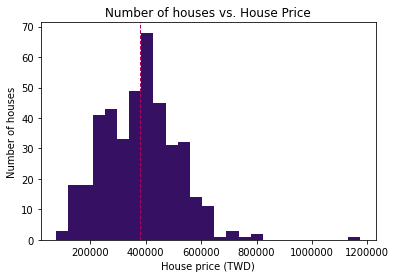

In [21]:
# Checking the distribution of the target variable (house_price)
plt.hist(df["house_price"], bins=25, color="#361163")
plt.xlabel("House price (TWD)")
plt.ylabel("Number of houses")
plt.title("Number of houses vs. House Price")
plt.ticklabel_format(style='plain')

# Plotting the line for average house price (house_price)
plt.axvline(df["house_price"].mean(), color='#B70062', linestyle='dashed', linewidth=1)
plt.show()

# ===== ADD COMMA TO VALUES
# ===== EXPAND THE TICKS?

- This plot shows the house price (house_price) and the number of houses sold in the price range.
- It is skewed right, where the right side is the highest house price sold, with only a one houses selling over 1,000,000TWD.
- Most houses sold between 70,000TWD - 600,000TWD.
- Around 15 houses' sale price was between 600,000TWD - 800,000TWD.

In [22]:
# What's the average distance to the nearest MRT station in meters?
print("The average distance to the nearest MRT station is",
      round(df.mrt_distance.mean(),2),
      "meters")

The average distance to the nearest MRT station is 1083.89 meters


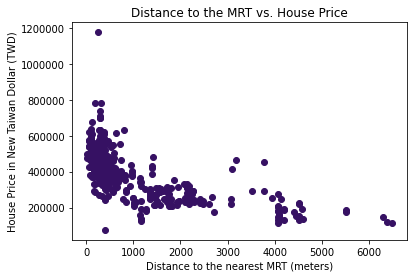

In [23]:
# Does the distance to the nearest MRT have an impact on the house price?
mrt = df.mrt_distance
house_price = df.house_price

# Visualisation

plt.scatter(mrt, house_price, color="#361163")
plt.ticklabel_format(style='plain')
plt.title('Distance to the MRT vs. House Price')
plt.xlabel('Distance to the nearest MRT (meters)')
plt.ylabel('House Price in New Taiwan Dollar (TWD)')
plt.show()

# ====== ADD COMMA TO THE Y AXIS PRICE
# ====== HIGHLIGHT THE OUTLIERS

In [24]:
# Investigating outlier 1
df[df['house_price'] == df.house_price.max()]

,transaction_date,house_age,mrt_distance,no_of_stores,latitude,longitude,house_price
270,2013.333333,10.8,252.58,1,24.9746,121.53046,1175000.0


In [25]:
# Investigating outlier 2
df[df['house_price'] == df.house_price.min()]

,transaction_date,house_age,mrt_distance,no_of_stores,latitude,longitude,house_price
113,2013.333333,14.8,393.26,6,24.96172,121.53812,76000.0



- It seems that the houses with the shortest distance to the MRT station have a higher house price.<br>
- It is also evident that the houses with a shorter distance to the MRT station, sold more than those that are further away from the nearest MRT station.<br>
- The outlier on the plot shows the house with highest price overall sold at 1,175,000 TWD, situated 252.58 meters away to the nearest MRT station.
- However, another outlier shows that the house sold at the lowest price was situated close to an MRT station with only 393.26 meters away.
- Nevertheless, the distance to the nearest MRT station (mrt_distance) is likely to be a strong predictor for the house price (house_price)

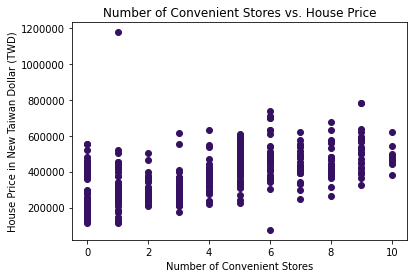

In [26]:
# Does having more convenient stores near the living circle increase the house price?
no_of_stores = df.no_of_stores

# Visualisation
plt.scatter(no_of_stores, house_price, color="#361163")
plt.ticklabel_format(style='plain')
plt.title('Number of Convenient Stores vs. House Price')
plt.xlabel('Number of Convenient Stores')
plt.ylabel('House Price in New Taiwan Dollar (TWD)')
plt.show()

# ===== ADD LINEAR LINE

- Despite the outlier present in the data, the plot overall shows that the number of the convenient stores in the living circle (no_of_stores) does some-what have a positive linear trend and could potentially be a good predictor for the house price (house_price)

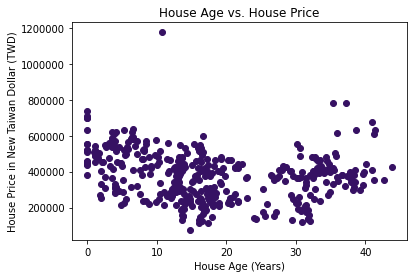

In [27]:
# Does the age of the house have impact on the sale price?
house_age = df.house_age

# Visualisation
plt.scatter(house_age, house_price, color="#361163")
plt.ticklabel_format(style='plain')
plt.title('House Age vs. House Price')
plt.xlabel('House Age (Years)')
plt.ylabel('House Price in New Taiwan Dollar (TWD)')
plt.show()

transaction_date    0.087529
house_age           0.210567
mrt_distance        0.673613
no_of_stores        0.571005
latitude            0.546307
longitude           0.523287
house_price         1.000000
Name: house_price, dtype: float64


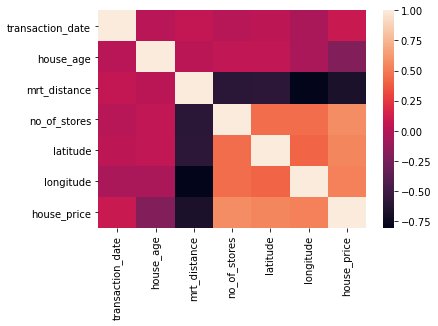

In [28]:
# What are the correlation of each attribute to the house price (house_price)?

# Visualisation
sns.heatmap(df.corr())

# The correlation of each attribute to the house price
print(abs(df.corr()['house_price']))

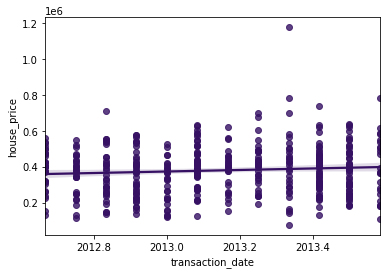

In [29]:
sns.regplot(x="transaction_date", y="house_price", data=df, color="#361163");

<AxesSubplot:xlabel='house_age', ylabel='house_price'>

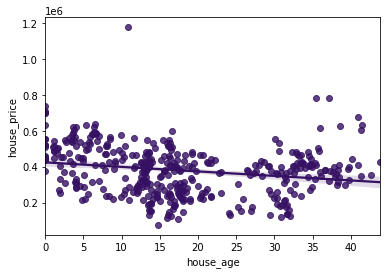

In [30]:
sns.regplot(x="house_age", y="house_price", data=df, color="#361163")

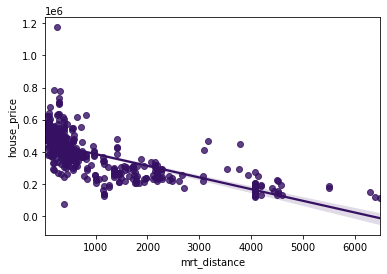

In [31]:
sns.regplot(x="mrt_distance", y="house_price", data=df, color="#361163");


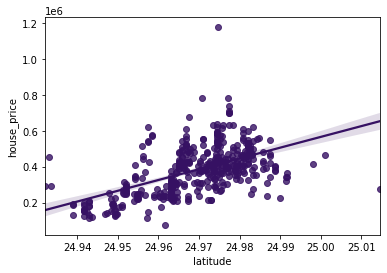

In [32]:
sns.regplot(x="latitude", y="house_price", data=df, color="#361163");


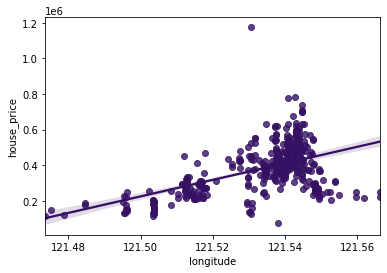

In [33]:
sns.regplot(x="longitude", y="house_price", data=df, color="#361163");


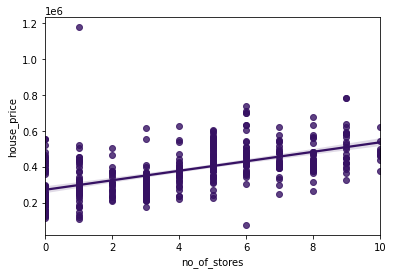

In [34]:
sns.regplot(x="no_of_stores", y="house_price", data=df, color="#361163");

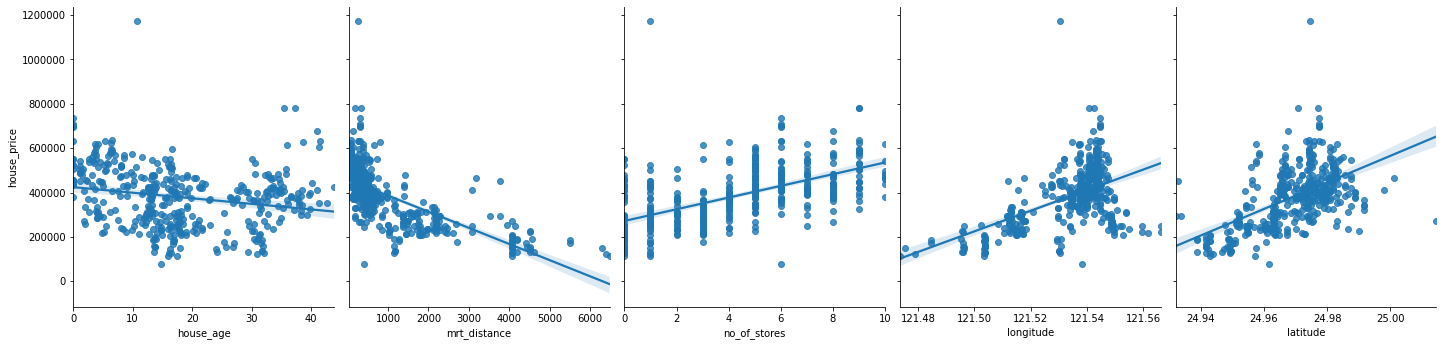

In [35]:
# # Multiple visualisation
sns.pairplot(df, x_vars=["house_age", "mrt_distance","no_of_stores", "longitude", "latitude"],
             y_vars=["house_price"], height=5, aspect=.8, kind="reg")
plt.ticklabel_format(style='plain')

In [36]:
# ===== DELETE THIS???
# fig, axs = plt.subplots(ncols=3)
# sns.regplot(x='no_of_stores', y='house_price', data=df, ax=axs[0])
# sns.regplot(x='mrt_distance', y='house_price', data=df, ax=axs[1])
# sns.regplot(x='longitude',y='house_price', data=df, ax=axs[2])
# plt.ticklabel_format(style='plain')

Text(0.5, 1.0, 'House price based on geo-location')

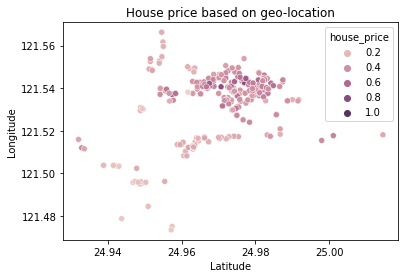

In [37]:
# Latitude, Longitude and House Price
latitude = df.latitude
longitude = df.longitude

# Visualising the Latitude, Longitude and Houseprice
# ===== Need to shorten the the house price
sns.scatterplot(data=df, x="latitude", y="longitude", hue="house_price", sizes=(20,200))
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("House price based on geo-location")
#CHECK LAT N LONG LOCATION

Text(0.5, 1.0, 'House price based on geo-location')

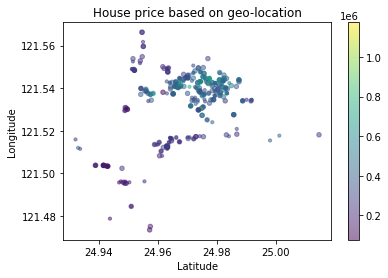

In [38]:
# Location vs. House Price
# ===== NEED TO SHOW X AXIS
# ===== NEED TO CONVER THE COLOUR BAR
# df.plot(kind='scatter',
#         x='longitude',
#         y='latitude',
#         alpha=0.4, label='House',
#         figsize=(15,10),
#         c='house_price',
#         cmap=plt.get_cmap("plasma"),
#         colorbar=True,
#         title='Location Vs. House Price')
# plt.ticklabel_format(style='plain')

plt.scatter(latitude, longitude, alpha = 0.5, c=house_price, sizes=(10,20))
plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("House price based on geo-location")

In [39]:
# Visualising the Real Estate Valuation Dataset sns.pairplot(df, hue='house_price')

#### Feature Selection
https://www.youtube.com/watch?v=iJ5c-XoHPFo&ab_channel=PhDandProductivity

We can see that the date of the house sale (transaction_date) has little to no correlation with the sale price (house_price). Therefore, I am removing this column.

In [40]:
abs(df.corr()['house_price'])

transaction_date    0.087529
house_age           0.210567
mrt_distance        0.673613
no_of_stores        0.571005
latitude            0.546307
longitude           0.523287
house_price         1.000000
Name: house_price, dtype: float64

In [41]:
col_drop = df[['transaction_date','house_age']]
df.drop(columns = col_drop, inplace = True)

In [42]:
df.head(10)

,mrt_distance,no_of_stores,latitude,longitude,house_price
0,84.88,10,24.98298,121.54024,379000.0
1,306.59,9,24.98034,121.53951,422000.0
2,561.98,5,24.98746,121.54391,473000.0
3,561.98,5,24.98746,121.54391,548000.0
4,390.57,5,24.97937,121.54245,431000.0
5,2175.03,3,24.96305,121.51254,321000.0
6,623.47,7,24.97933,121.53642,403000.0
7,287.60,6,24.98042,121.54228,467000.0
8,5512.04,1,24.95095,121.48458,188000.0
9,1783.18,3,24.96731,121.51486,221000.0


#### Feature Scaling 

Code adapted from:<br>
https://towardsdatascience.com/feature-scaling-effectively-choose-input-variables-based-on-distributions-3032207c921f
<br> 
https://www.baeldung.com/cs/normalization-vs-standardization


In [43]:
# Import relevant packages for feature scaling
from sklearn.preprocessing import StandardScaler # ===== DELETE THIS??
from sklearn.preprocessing import MinMaxScaler # ===== DELETE THIS??

In [44]:
# Original dataset
df.head()

,mrt_distance,no_of_stores,latitude,longitude,house_price
0,84.88,10,24.98298,121.54024,379000.0
1,306.59,9,24.98034,121.53951,422000.0
2,561.98,5,24.98746,121.54391,473000.0
3,561.98,5,24.98746,121.54391,548000.0
4,390.57,5,24.97937,121.54245,431000.0


In [45]:
# Normalised dataset
min_max = MinMaxScaler()
df_norm = min_max.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns = df.columns)
df_norm.head()

,mrt_distance,no_of_stores,latitude,longitude,house_price
0,0.009513,1.0,0.616941,0.719323,0.275705
1,0.043809,0.9,0.584949,0.711451,0.314832
2,0.083315,0.5,0.671231,0.758896,0.361237
3,0.083315,0.5,0.671231,0.758896,0.429481
4,0.056800,0.5,0.573194,0.743153,0.323021


In [46]:
# Standardised dataset
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)
df_std.head()

,mrt_distance,no_of_stores,latitude,longitude,house_price
0,-0.792494,2.007407,1.125430,0.448762,-0.005901
1,-0.616615,1.667503,0.912444,0.401139,0.310507
2,-0.414019,0.307885,1.486860,0.688183,0.685782
3,-0.414019,0.307885,1.486860,0.688183,1.237656
4,-0.549995,0.307885,0.834188,0.592937,0.376732


#### Importing relevant libraries

In [47]:
# Import relevant packages for building the models
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import relevant packages for the performance evaluation
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, median_absolute_error
# from sklearn.model_selection import cross_val_score ===== DELETE THIS

## Linear Regression

#### Fitting the model and making predictions (Original dataset)

In [48]:
# Splitting features(X) and target(y)
X = df.drop("house_price", axis = 1)
y = df.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the Linear Regression Model on original dataset
lin_reg = LinearRegression()

# Fit the Linear Regression Model
lin_reg.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_lin = lin_reg.predict(X_test)

#### Performance Evaluation

In [49]:
print("The performance evaluation of the Linear Regression model with the original dataset are as follows:\n")

# Checking the R squared score of the model [Best score: 1]
print("R-squared score is:", r2_score(y_test, y_pred_lin)),2

# Checking the Mean Squared Error of the model (MSE) [Best Value: 0.0]
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_lin))

# Checking the Mean Absolute Error (MAE), which shows the average difference between the prediction and the test [Best value: 0.0]
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_lin))

# ===== DELETE BELOW
# # Checking the Median Absoute Error (MAD) [Best value: 0.0]
# print("Median absolute error is:", median_absolute_error(y_test, y_pred_lin))

# # Checking the Explained Variance Score
# # (Best possible score: 1)
# print("Explained variance score is:", explained_variance_score(y_test, y_pred_lin))

The performance evaluation of the Linear Regression model with the original dataset are as follows:

R-squared score is: 0.6190689049792779
Mean suqared error is: 6390490318.049529
Mean absolute error is: 62435.48565725148


Text(0, 0.5, 'Actual House Price')

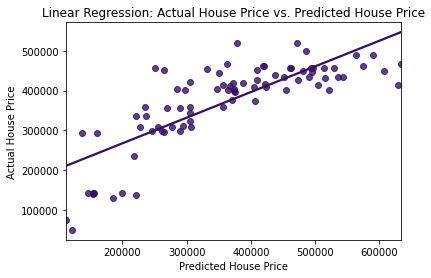

In [50]:
# Code adapted from https://stackoverflow.com/questions/52404857/how-do-i-plot-for-multiple-linear-regression-model-using-matplotlib
# Line of best fit for test vs. prediction
sns.regplot(x=y_test, y=y_pred_lin, ci=None, color="#361163")
plt.title("Linear Regression: Actual House Price vs. Predicted House Price")
plt.xlabel("Predicted House Price")
plt.ylabel("Actual House Price")
# ===== NEED TO INVERSE NORMALISATION ON X AXIS

#### Fitting the model and making predictions (Standardized data)

In [51]:
# Splitting features(X) and target(y)
X = df_std.drop("house_price", axis = 1)
y = df_std.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the Linear Regression Model on original dataset
lin_reg_std = LinearRegression()

# Fit the Linear Regression Model
lin_reg_std.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_lin_std = lin_reg_std.predict(X_test)

#### Performance Evaluation

In [52]:
print("R-squared score is:", r2_score(y_test, y_pred_lin_std))
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_lin_std))
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_lin_std))

R-squared score is: 0.6190689049792846
Mean suqared error is: 0.3460129905123967
Mean absolute error is: 0.4594207491379172


#### Fitting the model and making predictions (Normalized data)

In [53]:
# Splitting features(X) and target(y)
X = df_norm.drop("house_price", axis = 1)
y = df_norm.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Build the Linear Regression Model on original dataset
lin_reg_norm = LinearRegression()

# Fit the Linear Regression Model
lin_reg_norm.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_lin_norm = lin_reg_norm.predict(X_test)

#### Performance Evaluation

In [54]:
print("R-squared score is:", r2_score(y_test, y_pred_lin_norm))
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_lin_norm))
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_lin_norm))

R-squared score is: 0.6190689049792859
Mean suqared error is: 0.005291012607250195
Mean absolute error is: 0.0568111789419929


## Random Forest Regressor

In [55]:
# ===== NEED TO VISUALISE DECISION TREE

#### Fitting a 'Random Forest Regressor' model

In [56]:
# Splitting features(X) and target(y)
X = df.drop("house_price", axis = 1)
y = df.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the Random Forest Model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_rf = rf.predict(X_test)

In [57]:
# Visualise Random Forest Regressor

In [58]:
# ===== DELETE THIS
# ===== Checking the first 20 values of the predicted results against the first 20 values of the y_test
# y_pred_rf[:20]

In [59]:
# np.array(y_test[:20])

#### Performance Evaluation

In [60]:
print("The performance evaluation of the Random Forest Regression model are as follows:\n")

# Checking the R squared score of the model
# (Best score: 1)
print("R-squared score is:", r2_score(y_test, y_pred_rf))

# Checking the Mean Squared Error of the model (MSE)
# (Best Value: 0.0)
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_rf))

# Checking the Mean Absolute Error (MAE), which shows the average difference between the prediction and the test
# Best value: 0.0
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_rf))

The performance evaluation of the Random Forest Regression model are as follows:

R-squared score is: 0.7783228785785916
Mean suqared error is: 3718849725.5639834
Mean absolute error is: 42197.80255220013


#### Fitting the model and making predictions (Standardized data)

In [61]:
# Splitting features(X) and target(y)
X = df_std.drop("house_price", axis = 1)
y = df_std.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the Random Forest Model
rf_std = RandomForestRegressor()

# Fit the model
rf_std.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_rf_std = rf_std.predict(X_test)

In [62]:
print("The performance evaluation of the Random Forest Regression model on a standardized dataset are as follows:\n")

# Checking the R squared score of the model
# (Best score: 1)
print("R-squared score is:", r2_score(y_test, y_pred_rf_std))

# Checking the Mean Squared Error of the model (MSE)
# (Best Value: 0.0)
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_rf_std))

# Checking the Mean Absolute Error (MAE), which shows the average difference between the prediction and the test
# Best value: 0.0
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_rf_std))

The performance evaluation of the Random Forest Regression model on a standardized dataset are as follows:

R-squared score is: 0.7793936827839472
Mean suqared error is: 0.20038440690094317
Mean absolute error is: 0.31026298679377085


#### Fitting the model and making predictions (Normalized data)

In [63]:
# Splitting features(X) and target(y)
X = df_norm.drop("house_price", axis = 1)
y = df_norm.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the Random Forest Model
rf_norm = RandomForestRegressor()

# Fit the model
rf_norm.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_rf_norm = rf_norm.predict(X_test)

In [64]:
print("The performance evaluation of the Random Forest Regression model on a normalzed dataset are as follows:\n")

# Checking the R squared score of the model
# (Best score: 1)
print("R-squared score is:", r2_score(y_test, y_pred_rf_norm))

# Checking the Mean Squared Error of the model (MSE)
# (Best Value: 0.0)
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_rf_norm))

# Checking the Mean Absolute Error (MAE), which shows the average difference between the prediction and the test
# Best value: 0.0
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_rf_norm))

The performance evaluation of the Random Forest Regression model on a normalzed dataset are as follows:

R-squared score is: 0.77840726399712
Mean suqared error is: 0.003077853121448505
Mean absolute error is: 0.038285173755379404


In [65]:
# Cross Validation
# np.random.seed(42)
# cv_r2 = cross_val_score(rf, X, y, cv=5)
# np.mean(cv_r2)

In [66]:
# cv_mse = cross_val_score(rf, X, y, cv=5, scoring="neg_mean_squared_error")
# np.mean(cv_mse)

In [67]:
# cv_mse

In [68]:
# cv_mae = cross_val_score(rf, X, y, cv=5, scoring="neg_mean_absolute_error")
# np.mean(cv_mae)

In [69]:
# cv_mae

In [70]:
# # Splitting into training and testing sets
# np.random.seed(42)
# X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size = 0.2)

# # Build the Linear Regression Model on original dataset
# # rf_std = RandomForestRegressor()

# # Fit the Linear Regression Model
# rf_std.fit(X_train, y_train)

# # Using the model to make a prediction
# y_pred_rf_std = rf_std.predict(X_test)

# print("R-squared score is:", r2_score(y_test, y_pred_rf_std))
# print("Mean suqared error is:", mean_squared_error(y_test, y_pred_rf_std))
# print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_rf_std))

## Support Vector Regression (SVR)

#### Fitting a 'Support Vector Regression (SVR)' model¶

In [71]:
from sklearn.svm import SVR

In [72]:
# Splitting features(X) and target(y)
X = df.drop("house_price", axis = 1)
y = df.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the SVR Model
svr = SVR(kernel = "linear")

# Fit the model
svr.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_svr = svr.predict(X_test)

In [73]:
print("The performance evaluation of the Support Vector Regression model are as follows:\n")

# Checking the R squared score of the model
# (Best score: 1)
print("R-squared score is:", r2_score(y_test, y_pred_svr))

# Checking the Mean Squared Error of the model (MSE)
# (Best Value: 0.0)
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_svr))

# Checking the Mean Absolute Error (MAE), which shows the average difference between the prediction and the test
# Best value: 0.0
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_svr))

The performance evaluation of the Support Vector Regression model are as follows:

R-squared score is: 0.5525410985108303
Mean suqared error is: 7506559099.713468
Mean absolute error is: 67979.464328913


#### Fitting the model and making predictions (Standardized data)

In [74]:
# Splitting features(X) and target(y)
X = df_std.drop("house_price", axis = 1)
y = df_std.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the SVR Model
svr_std = SVR(kernel = "linear")

# Fit the model
svr_std.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_svr_std = svr_std.predict(X_test)

In [75]:
print("The performance evaluation of the Support Vector Regression model on standardized data are as follows:\n")

# Checking the R squared score of the model
# (Best score: 1)
print("R-squared score is:", r2_score(y_test, y_pred_svr_std))

# Checking the Mean Squared Error of the model (MSE)
# (Best Value: 0.0)
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_svr_std))

# Checking the Mean Absolute Error (MAE), which shows the average difference between the prediction and the test
# Best value: 0.0
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_svr_std))

The performance evaluation of the Support Vector Regression model on standardized data are as follows:

R-squared score is: 0.6212217698486597
Mean suqared error is: 0.3440574683159715
Mean absolute error is: 0.44554253803931504


#### Fitting the model and making predictions (Normalized data)

In [76]:
# Splitting features(X) and target(y)
X = df_norm.drop("house_price", axis = 1)
y = df_norm.house_price

# Splitting into training and testing sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Build the SVR Model
svr_norm = SVR(kernel = "linear")

# Fit the model
svr_norm.fit(X_train, y_train)

# Using the model to make a prediction
y_pred_svr_norm = svr_norm.predict(X_test)

In [77]:
print("The performance evaluation of the Support Vector Regression model on normalized data are as follows:\n")

# Checking the R squared score of the model
# (Best score: 1)
print("R-squared score is:", r2_score(y_test, y_pred_svr_norm))

# Checking the Mean Squared Error of the model (MSE)
# (Best Value: 0.0)
print("Mean suqared error is:", mean_squared_error(y_test, y_pred_svr_norm))

# Checking the Mean Absolute Error (MAE), which shows the average difference between the prediction and the test
# Best value: 0.0
print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_svr_norm))

The performance evaluation of the Support Vector Regression model on normalized data are as follows:

R-squared score is: 0.6036581747513462
Mean suqared error is: 0.0055050627832236914
Mean absolute error is: 0.05803200643356396


In [78]:
# ===== DENORMALISE DATA WITH .inverse_transform()
# min_max.inverse_transform(df_norm)


## Ridge Regression
Similar to linear regression

In [79]:
# from sklearn.linear_model import Ridge

In [80]:
# # Splitting features(X) and target(y)
# X = df.drop("house_price", axis = 1)
# y = df.house_price

# # Splitting into training and testing sets
# np.random.seed(42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# # Build the Ridge Model
# rid = Ridge()

# # Fit the model
# rid.fit(X_train, y_train)

# # Using the model to make a prediction
# y_pred_rid = rid.predict(X_test)

In [81]:
# Checking if model works on new data i introduce.
# xxx = np.array([4082.02,0,24.94155,121.50381])
# xxx = xxx.reshape((1,-1))
# rid.predict(xxx)

#### Performance Evaluation

In [82]:
# print("The performance evaluation of the Ridge Regression model are as follows:\n")

# # Checking the R squared score of the model
# # (Best score: 1)
# print("R-squared score is:", r2_score(y_test, y_pred_rid))

# # Checking the Mean Squared Error of the model (MSE)
# # (Best Value: 0.0)
# print("Mean suqared error is:", mean_squared_error(y_test, y_pred_rid))

# # Checking the Mean Absolute Error (MAE), which shows the average difference between the prediction and the test
# # Best value: 0.0
# print("Mean absolute error is:",mean_absolute_error(y_test, y_pred_rid))

## KNearestNeighbor

In [83]:
# KNearestNeighbour 

In [84]:
# Visualising multi
# dimension reduction technique
# using coloours to represent the price
# heatmap? low, medium, high price.

In [85]:
# Cross validation

In [86]:
# Iterations

In [87]:
# Wednesday's lab